# `Hypothesis Testing`
> - Z-test
    - One sample z-test
    - two sample z-test
> - T-test
    - One sample t-test
    - two sample t-test
> - Correlation - test (Consider as test )
> - Chisquare-test
> - One way ANOVA

## `Z test -------------------`

##### Step 1: Define null and alternative hypotheses
- $H_0 - Null Hypothesis(CLAIM)$   There is no change in mean of sample and mean of population
- $H_A - Alternate Hypothesis(Contradiction)$ There is  chanage in mean of sample and mean of population

##### Step 2: Decide the significance level
Here we select $\alpha$ = 0.05 and it is given that n, sample size = 50.
<br> Calculated based upon 95% confidence interval

##### Step 3: Identify the test statistic
We know the population standard deviation and the sample is a large sample, n>30. So you use the normal distribution and the $Z_STAT$ test statistic.

##### Step 4: Calculate the critical value and test statistic

## `One sample Z test` 
#### You compare the sample mean with population mean

In [1]:
import numpy as np
import seaborn as sns
import random

population = np.random.normal(400,4,1000000) # consider this as a bike mileage

<AxesSubplot:ylabel='Density'>

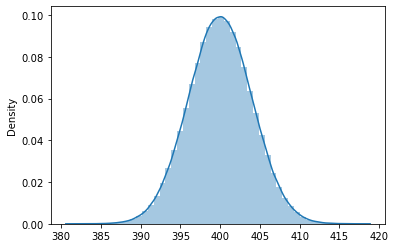

In [3]:
import warnings
warnings.filterwarnings('ignore')
sns.distplot(population)

In [6]:
population_mean = np.mean(population)

In [5]:
sample = random.sample(list(population),50)

In [7]:
from statsmodels.stats.weightstats import ztest
z_statistics , p_value = ztest(x1=sample,x2=None,value=population_mean)
print(f"z_statistics = {z_statistics} and p-value = {p_value}")

z_statistics = -0.9012726713903081 and p-value = 0.3674433604369314


### z-score is z-statistic: (x-mu)/std_error
### is P_value < 0.05 ?? : no 
**Rejected the alternate hypothesis in this case**

## `Two sample Z test` 
#### You compare 2 samples mean

##### H0 :- means difference between two sample is 0 (Similar mean)
##### H1:- mean difference between two sample is not 0 (Mean is not similar)

In [9]:
sample1 = np.random.normal(400,4,50) # consider this as a bike mileage
sample2 = np.random.normal(200,4,50) # consider this as a bike mileage

In [10]:
from statsmodels.stats.weightstats import ztest
z_statistics , p_value = ztest(x1=sample1,x2=sample2)
print(f"z_statistics = {z_statistics} and p-value = {p_value}")

z_statistics = 263.42851192432545 and p-value = 0.0


### I don't have a population here

##### is P_value < 0.05 ?? -> Yes 
Rejected the null hypothesis in this case and accept alternate hypothesis

In [11]:
sample1 = np.random.normal(400,4,50) # consider this as a bike mileage
sample2 = np.random.normal(400,4,50) # consider this as a bike mileage

from statsmodels.stats.weightstats import ztest
z_statistics , p_value = ztest(x1=sample1,x2=sample2)
print(f"z_statistics = {z_statistics} and p-value = {p_value}")

z_statistics = -0.7845072878064632 and p-value = 0.4327425073429464


##### is P_value < 0.05 ?? -> no 
Rejected the alternate hypothesis in this case

# `T-test ------------------------`
### Population variance is not known

##### `Very rarely we know the variance of the population.` 

A common strategy to assess hypothesis is to conduct a t test. A t test can tell whether two groups have the same mean. 
A t test can be estimated for:
* 1) One sample t test
* 2) Two sample t test (including paired t test)

We assume that the samples are randomly selected, independent and come from a normally distributed population with unknown but equal variances.


## `One Sample T test`

We use a one sample T-test to determine whether our sample mean (observed average) is statistically significantly different to the population mean (expected average).

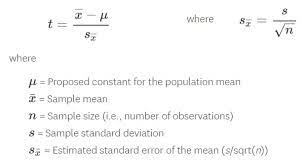



- $H_0 - Null Hypothesis(CLAIM)$   There is no change in mean of sample and mean of population
- $H_A - Alternate Hypothesis(Contradiction)$ There is  change in mean of sample and mean of population

### Example

* Let’s say we want to calculate the resting systolic blood pressure of 20 first-year resident female doctors and compare it to the general public population mean of 120 mmHg.

The null hypothesis is that there is no significant difference between the blood pressure of the resident female doctors and the general population.

In [24]:
female_doctor_bps = [128, 127, 118, 115, 144, 142, 133, 140, 132, 131, 
                     111, 132, 149, 122, 139, 119, 136, 129, 126, 128]

In [25]:
from scipy.stats import ttest_1samp
ttest_results = ttest_1samp(female_doctor_bps,120)

In [27]:
ttest_results

Ttest_1sampResult(statistic=4.512403659336718, pvalue=0.00023838063630967753)

The p-value in this case is 0.0002, which is far less than the standard thresholds of 0.05 or 0.01, so we reject the null hypothesis and we can say there is a statistically significant difference between the resting systolic blood pressure of the resident female doctors and the general population.

## `Two Sample T test`

A two sample T-test is used to compare the means of two separate samples.

It is calculated as follows (assuming equal variances)

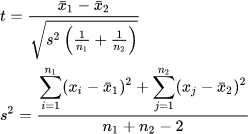

### Example

* Let’s look at an example to compare the blood pressure of male consultant doctors with the junior resident female doctors we explored above.

Our null hypothesis in this case is that there is no statistically significant difference in the mean of male consulting doctors and junior resident female doctors.

In [12]:
# grp - 1
female_doctor_bps = [128, 127, 118, 115, 144, 142, 133, 140, 132, 131, 
                     111, 132, 149, 122, 139, 119, 136, 129, 126, 128]

# grp - 2
male_consultant_bps = [118, 115, 112, 120, 124, 130, 123, 110, 120, 121,
                      123, 125, 129, 130, 112, 117, 119, 120, 123, 128]

<AxesSubplot:ylabel='Density'>

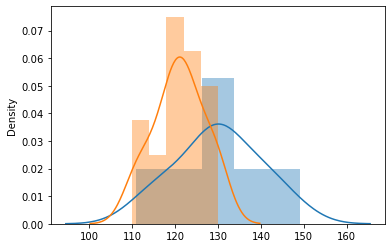

In [13]:
sns.distplot(female_doctor_bps)
sns.distplot(male_consultant_bps)

In [14]:
from scipy.stats import ttest_ind
ttest_results = ttest_ind(female_doctor_bps,male_consultant_bps)

In [15]:
ttest_results

Ttest_indResult(statistic=3.5143256412718564, pvalue=0.0011571376404026158)

## `Paired T Test (Good to know)`
- **Previously the observations in our two samples have been completely independent of one another**.

- **Perhaps we want to compare two related samples, e.g. a before and after test, we might use a paired T-test**.

### Example

* We will measure the amount of sleep got by patients before and after taking soporific drugs to help them sleep.

* **The null hypothesis is that the soporific drug has no effect on the sleep duration of the patients**.

In [16]:
control = [8.0, 7.1, 6.5, 6.7, 7.2, 5.4, 4.7, 8.1, 6.3, 4.8]
treatment = [9.9, 7.9, 7.6, 6.8, 7.1, 9.9, 10.5, 9.7, 10.9, 8.2]

In [17]:
from scipy.stats import ttest_rel
ttest_rel(control, treatment)

Ttest_relResult(statistic=-3.6244859951782136, pvalue=0.0055329408161001415)

The p-value is 0.0055, which again is below than the standard thresholds of 0.05 or 0.01, so we reject the null hypothesis and we can say there is a statistically significant difference in sleep duration caused by the soporific drug.

# `END ---------------------------------------`